# 18 Multi-Linear Regression
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

* Brunton, Chapter 1, Sections 1.1-1.4
-----

## Mathematical Overview

Recall that we can estimate $X$ by choosing a small rank:
$$X\approx \tilde{X} = \tilde{U}\tilde{\Sigma}\tilde{V}^T$$

Stated in 1936 and shows that this is the best approximation for $X$ for a rank-$r$
$$\underset{\tilde{X} s.t. rank(\tilde{X})=r}{argmin} ||X-\tilde{X}||_F=\tilde{U}\tilde{\Sigma}\tilde{V}^T$$

### Frobenius Norm

$$||A||_F = \sqrt{\sum_{i,j} (A_{ij})^2}$$

### Geometric Interpretation of SVD

#### Unitary Transformations

Recall that in the SVD,
$$X = U\Sigma V^T = \hat{U}\hat{\Sigma}V^T$$

$U$ and $V$ are unitary. That is,
$$U U^T = U^T U = \mathbb{I}_{mxm}$$
$$V V^T = V^T V = \mathbb{I}_{nxn}$$

If we say $X$ is an $m$ x $n$ matrix, then $U$ is $m$ x $m$, and $V$ is $n$ x $n$. Note that using the economy $\hat{U}$, then $\hat{U}^T \hat{U}=\mathbb{I}$, but $\hat{U} \hat{U}^T \ne \mathbb{I}$.

Unitary Transformations preserve vectors and lengths of vectors within a vector space. (Constellations are a good example – angles and distances between stars remain the same, even though they move from one side of the sky to the other.) Essentially, they just rotate vectors. This means, if I have two matrices x and y, then when they are both transformed,
$$<x,y> = <Ux,Uy> \forall x,y\in\mathbb{R}^n$$

The Fourier Transform is one of the most famous and most widely used unitary transforms. 

If $X$ is complex, that is if $X\in \mathbb{C}^{nxm}$, then $X^*$ is complex conjugate transpose. To take the complex conjugate transpose of a matrix,
* Transpose the matrix
* Take the complex conjugate of each element

#### Geometric Perspective

While $U$ and $V$ create unitary transformations, simply rotating the vector space, the matrix $X$ is not unitary. So, it can create a change in the space. Take a vector $v$ in the $\mathbb{R}^n$ space (a sphere). When we transform this with,
$$v \to Xv \qquad (\mathbb{R}^n \to \mathbb{R}^m)$$

Then it maps our basis of vectors into a rotated and changed ellipsoid. The length of the principle axes of the ellipsoid are given by the singular values of X. The left-singular matrix U would then tell orientation of the ellipsoid.


#### Demo of Geometric Perspective

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

### Set up rotation matrix
theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

In [4]:
### Take the SVD
U, S, VT = np.linalg.svd(X,full_matrices=False)
X2 = U @ np.diag(S)
print(X2)
print(S)

[[-2.78437034  0.08278149  0.18147596]
 [ 0.44100094  0.97722903  0.0765087 ]
 [-1.02606043  0.19537308 -0.45957904]]
[3.  1.  0.5]


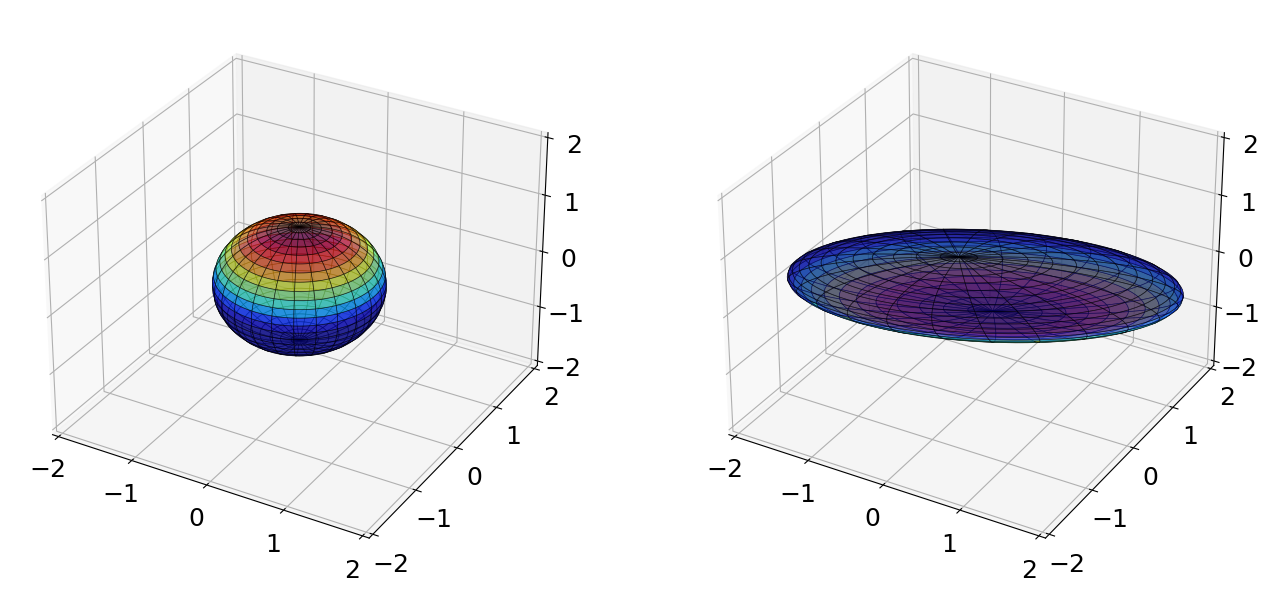

In [4]:
### Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

### Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        xR[i,j], yR[i,j], zR[i,j] = X @ [x[i,j], y[i,j], z[i,j]]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()

> Note that X can multiply wide, short vectors vX, or it can multiply long, skinny vectors Xv.

If X is not square, then it maps from one dimension to another. For example, if X is a 2x3 matrix, then it maps a 3D sphere into a 2D ellipsoid.

## Least Squares, Regression, and the pseudo-inverse
$$Ax=b$$

$A$ is known, $b$ is known, and we want to know $x$. We have typically looked at this where $A$ is a square. If it's not square, it's been difficult to calculate.

But the SVD allows us to generalize this for non-square $A$ matrices.

An __underdetermined__ matrix is one where $n<m$ (a short, fat matrix). In this case, there are more variables than there are equations. Not enough measurements in $b$ to determine a single, unique solution $x$. This often (not always) gives an infinite number of solutions.

An __overdetermined__ matrix is one where $n>m$ (a tall, skinny matrix). In this case, there are more equations than needed. In general, there are too many measurements in $b$, so there is no unique solution $x$. Again, not always true.

SVD allows us to "invert" $A$ (known as a pseudo-inverse) which can be used to approximate $x$.

$$A=\hat{U}\hat{\Sigma}V^T$$
$$Ax=b$$
$$\hat{U}\hat{\Sigma}V^Tx=b$$
$$V\Sigma^{-1}U^T U\Sigma V^T x = V\Sigma^{-1}U^T b$$
$$x = V\Sigma^{-1}U^T b$$
$$x = A^\dagger b$$

where $A^\dagger$ is known as the __Moore-Penrose__ (left) __Pseudo Inverse__. We can use $A^\dagger$ to approximate $x$
$$\tilde{x} = A^\dagger b$$

In the underdetermined case, there are an infinite number of solutions. Which one is right? We generally say that the *minimum-norm solution* is the one where $\min{||\tilde{x}||_2}$ such that $A\tilde{x}=b$.

In the overdetermined solution, we can find the $\tilde{x}$ that minimizes the error:
$$\min||A\tilde{x}-b||_2$$
This is known as the least squares solution.

So, how well does this work? To find out, let's plug everything back in:
$$A=\hat{U}\hat{\Sigma}V^T \qquad \tilde{x} = A^\dagger b = V\Sigma^{-1}U^T b$$
$$A\tilde{x} = \hat{U}\Sigma V^T V\Sigma^{-1} \hat{U}^T b$$
$$A\tilde{x} = \hat{U}\hat{U}^T b$$

Remember that $\hat{U}$ is not unitary, so $\hat{U}\hat{U}^T\ne \mathbb{I}$. So what is this? $\hat{U}\hat{U}^T b$ is the projection of $b$ onto $span(\hat{U}) = span(A)$. 

In the underdetermined case, this makes sense because the only way to get a solution of $Ax=b$ is if $b$ is in the column space (or the span) of $A$. If $b$ doesn't appear as a column of $A$, there are plenty of columns to create a linear combination of the different columns to find $b$.

In the overdetermined case, the only way to get a solution is if $b$ is a columnn of $A$. Since there are more rows than column, it is much more likely that there is one component of $b$ that can't be found using a linear combination of the columns of $A$. So, the only way to guarantee a solution is if $b$ is a column of $A$. But by using the SVD, we get $\hat{U}\hat{U}^Tb$ which is a project of $b$ onto the span of $\hat{U}$ (or of $A$), which will determine a solution.